# Question 1
- mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(min-max scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv',index_col=0)
# df.to_csv('c:/workspace/cakd3/수업/dataset/mtcars.csv')
df = pd.read_csv('c:/workspace/cakd3/수업/dataset/mtcars.csv',index_col=0)
df.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df['qsec'] = minmax.fit_transform(df[['qsec']])
len(df[df['qsec']>=0.5])

9

In [28]:
# 풀이
X_MinMax = (df['qsec']-df['qsec'].min(axis=0)) / (df['qsec'].max(axis=0)-df['qsec'].min(axis=0))
len(X_MinMax[X_MinMax>0.5])

9

# Question 2
- mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 표준정규분포 데이터 표준화 (standardization) 변환 후 최대, 최소값을 각각 구하시오.

In [33]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('c:/workspace/cakd3/수업/dataset/mtcars.csv',index_col=0)
scaler = StandardScaler()
df['qsec'] = scaler.fit_transform(df[['qsec']])
print(f'min value : {df.qsec.min()}')
print(f'max value : {df.qsec.max()}')

min value : -1.9039963517625231
max value : 2.8719855384368587


# Question 3
- mtcars 데이터셋(mtcars.csv)의 wt 컬럼의 이상치(IQR 1.5 외부에 존재하는)값들을 outlier 변수에 저장하라

In [52]:
Q1 = df.wt.describe()['25%']
Q3 = df.wt.describe()['75%']
IQR = Q3 - Q1
outlier = []
for i in df['wt']:
    if i <= Q1 - (1.5*IQR) or i >= Q3+ (1.5*IQR):
        outlier.append(i)
print(outlier)

[5.25, 5.424, 5.345]


In [67]:
# 풀이
import numpy as np
q75,q25 = np.percentile(df.wt, [75,25])
iqr = q75 - q25
outlier = df.wt[(df.wt>= q75 + iqr*1.5) | (df.wt <= q25 - iqr*1.5)].values
outlier

array([5.25 , 5.424, 5.345])

# Question 4
- mtcars 데이터셋에서 mpg변수와 나머지 변수들의 상관계수를 구하여 다음과 같이 내림차순 정렬하여 표현하라

In [110]:
df.corr().iloc[1:,[0]].sort_values(by='mpg',ascending=False)

,mpg
drat,0.681172
vs,0.664039
am,0.599832
gear,0.480285
qsec,0.418684
carb,-0.550925
hp,-0.776168
disp,-0.847551
cyl,-0.852162
wt,-0.867659


In [101]:
# 풀이
df.corr()[['mpg']][1:].sort_values('mpg',ascending=False)

,mpg
drat,0.681172
vs,0.664039
am,0.599832
gear,0.480285
qsec,0.418684
carb,-0.550925
hp,-0.776168
disp,-0.847551
cyl,-0.852162
wt,-0.867659


# Question 5
- mtcars 데이터셋에서 mpg변수를 제외하고 데이터 정규화 (standardscaler) 과정을 진행한 이후 PCA를 통해 변수 축소를 하려한다. 누적설명 분산량이 92%를 넘기기 위해서는 몇개의 주성분을 선택해야하는지 설명하라

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pcaDf = df.iloc[:,1:]
pcaDf = scaler.fit_transform(pcaDf)

componentsNum=10
pca = PCA(n_components=componentsNum) 
printcipalComponents = pca.fit_transform(pcaDf)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

componentDf = pd.DataFrame(pca.explained_variance_ratio_,columns=['cumsumVariance']).cumsum().reset_index()
componentDf['index'] +=1
componentDf=componentDf.rename(columns={'index':'componentsCount'})
componentDf

,componentsCount,cumsumVariance
0,1,0.576022
1,2,0.840986
2,3,0.900708
3,4,0.927658
4,5,0.949883
5,6,0.970895
6,7,0.984187
7,8,0.992255
8,9,0.997620
9,10,1.000000


# Question 6
- mtcars 의 index는 (업체명) - (모델명)으로 구성된다. (valiant는 업체명) mtcars에 ‘brand’ 컬럼을 추가하고 value 값으로 업체명을 입력하라

In [219]:
df['brand'] = df.index.map(lambda x:x.split(' ')[0])
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
Mazda RX4,21.0,6,160.0,110,3.90,2.620,-0.789601,0,1,4,4,Mazda
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,-0.471202,0,1,4,4,Mazda
Datsun 710,22.8,4,108.0,93,3.85,2.320,0.432823,1,1,4,1,Datsun
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,0.904736,1,0,3,1,Hornet
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,-0.471202,0,0,3,2,Hornet


# Question 7
- 추가된 brand 컬럼을 제외한 모든 컬럼을 통해 pca를 실시한다. 2개의 주성분과 brand컬럼으로 구성된 새로운 데이터 프레임을 출력하고, brand에 따른 2개 주성분을 시각화하여라 (brand를 구분 할수 있도록 색이다른 scatterplot, legend를 표시한다)

In [242]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.iloc[:,:-1]), index=df.index)
df_pca = pd.concat([df_pca, df[['brand']]], axis=1)
df_pca.head()

,0,1,brand
Mazda RX4,-79.603873,-2.165961,Mazda
Mazda RX4 Wag,-79.603490,-2.171726,Mazda
Datsun 710,-133.892724,5.055147,Datsun
Hornet 4 Drive,8.524301,-44.967174,Hornet
Hornet Sportabout,128.684832,-30.822223,Hornet


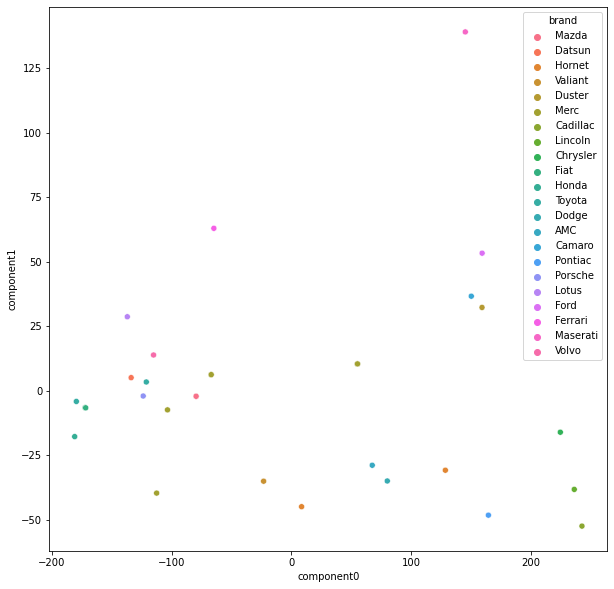

In [243]:
# 풀이
pcaDf = df.drop('brand',axis=1)
componentsNum=2
pca = PCA(n_components=componentsNum) 
printcipalComponents = pca.fit_transform(pcaDf)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

principalDf['brand'] = df['brand'].values
principalDf.head()

import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='component0', y='component1', hue='brand', data=principalDf)
plt.show()